In [50]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144617 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [42]:
!pip install deepface
import deepface 
from IPython.display import Image
from deepface import DeepFace 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [44]:
def capturePhoto():
  image=take_photo()
  img=cv2.imread(image)
  return img

In [45]:
img_origin=capturePhoto()
img_Hat=capturePhoto()
img_mask=capturePhoto()
img_maskANDhat=capturePhoto()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Image with bot,mask and hat')

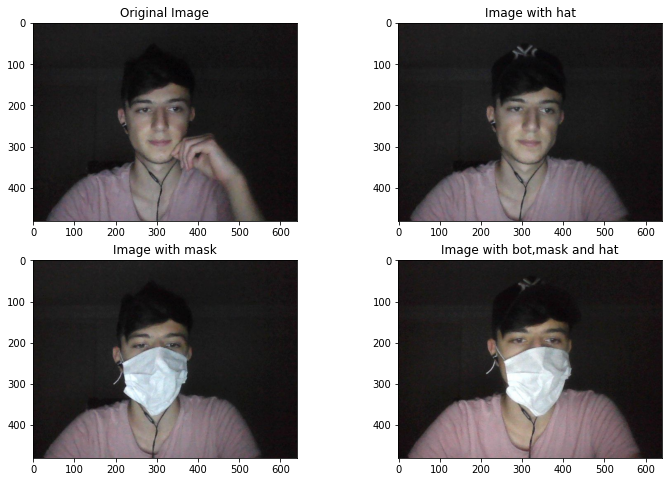

In [46]:
fig, axs = plt.subplots(2, 2,figsize=(12,8))

axs[0, 0].imshow(img_origin[:,:,::-1])
axs[0, 0].set_title("Original Image")
axs[0, 1].imshow(img_Hat[:,:,::-1])
axs[0, 1].set_title("Image with hat")
axs[1, 0].imshow(img_mask[:,:,::-1])
axs[1, 0].set_title("Image with mask")
axs[1, 1].imshow(img_maskANDhat[:,:,::-1])
axs[1, 1].set_title("Image with bot,mask and hat")

In [47]:
def detect_suspect(image):
  
  result=DeepFace.verify(img_origin,image)
  if (result['verified']==True):
    alert_message="They exactly matched"
  else:
    alert_message="No similarity detected!"
  return alert_message

In [51]:
alert1=detect_suspect(img_Hat)
alert2=detect_suspect(img_mask)
alert3=detect_suspect(img_maskANDhat)

Using VGG-Face model backend and cosine distance.


ResourceExhaustedError: ignored

Text(0.5, 1.0, 'No similarity detected!')

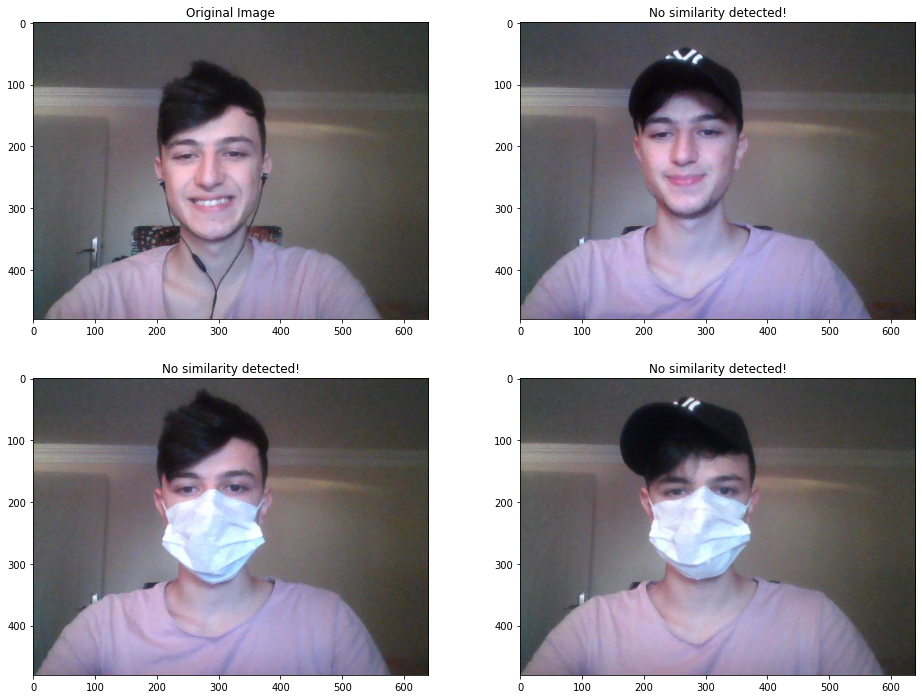

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(16,12))

axs[0, 0].imshow(img_origin[:,:,::-1])
axs[0, 0].set_title("Original Image")
axs[0, 1].imshow(img_Hat[:,:,::-1])
axs[0, 1].set_title(alert1)
axs[1, 0].imshow(img_mask[:,:,::-1])
axs[1, 0].set_title(alert1)
axs[1, 1].imshow(img_maskANDhat[:,:,::-1])
axs[1, 1].set_title(alert1)
